# Implementation of classification algorithm in Python


## Understanding Classification

Although regression and classification appear to be very different they are in fact similar problems. 

In regression our predictions for the response are real-valued numbers; on the other hand, in classification the response is a mutually exclusive class label such as "Is the email spam/ham?" or "Is the credit card transaction fraudulent?". If the number of classes is equal to two, then we call it a binary classification problem; if there are more than two classes, then we call it a multiclass classification problem. In the following we will assume binary classification because it's the more general case, and — we can always represent a multiclass problem as a sequence of binary classification problems.

We can also think of classification as a function estimation problem where the function that we want to estimate separates the two classes. This is illustrated in the example below where our goal is to predict whether or not a credit card transaction is fraudulent -- the dataset is provided by James et al., <a href="http://www-bcf.usc.edu/~gareth/ISL/">Introduction to Statistical Learning</a>.

In [72]:
import pandas as pd

data = pd.read_csv('/Users/stephen/Documents/college/machine-learning/assignment-3/data/owls-csv.csv')
y_values = []
#convert all strings to floats
for index,item in enumerate(data.a):
    float(data.a[index]);
    float(data.b[index]);
    float(data.c[index]);
    float(data.d[index]);
    y_values.append(index)

print(y_values)

df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)

# downsample negative cases -- there are many more negatives than positives
indices = np.where(df.default == 'No')[0]
rng = np.random.RandomState(13)
rng.shuffle(indices)
n_pos = (df.default == 'Yes').sum()
df = df.drop(df.index[indices[n_pos:]])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134]


Print a scatter plot of the variables

Populating the interactive namespace from numpy and matplotlib


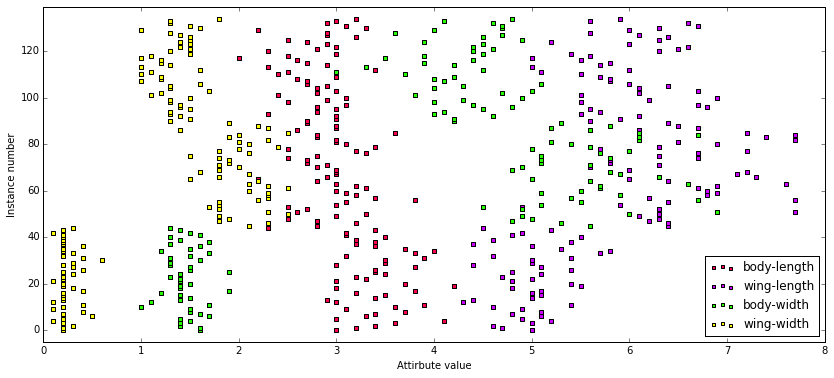

In [105]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
%pylab inline

# setup figure
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

fig = plt.figure(num=None, figsize=(14, 6), facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(111)
ax1.scatter(data.a, y_values, s=10, c='#FF004D', marker="s", label='body-length', cmap=cm_bright)
ax1.scatter(data.b, y_values, s=10, c='#C900FF', marker="s", label='wing-length', cmap=cm_bright)
ax1.scatter(data.c, y_values, s=10, c='#26FF00', marker="s", label='body-width', cmap=cm_bright)
ax1.scatter(data.d, y_values, s=10, c='#FCFF00', marker="s", label='wing-width', cmap=cm_bright) 
ax1.set_xlim((0, 8))
ax1.set_ylim( (y_values[0] - 5), (y_values[len(y_values)-1]) + 5)
ax1.set_xlabel('Attirbute value')
ax1.set_ylabel('Instance number')

plt.legend(loc='lower right');
show()

In [97]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

# # the larger operator will return a boolean array which we will cast as integers for fancy indexing
# y_pred = (2 * (est.predict(X) > 0.0)) - 1

# def confusion_matrix(y_test, y_pred):
#     cm = sk_confusion_matrix(y, y_pred)
#     cm = pd.DataFrame(data=cm, columns=[-1, 1], index=[-1, 1])
#     cm.columns.name = 'Predicted label'
#     cm.index.name = 'True label'
#     error_rate = (y_pred != y).mean()
#     print('error rate: %.2f' % error_rate)
#     return cm
    
# confusion_matrix(y, y_pred)

In the above example we are assessing the model performance on the same data that we used to fit the model. This might be a biased estimate of the models performance, for a classifier that simply memorizes the training data has zero training error but would be totally useless to make predictions. It is much better to assess the model performance on a separate dataset called the test data or held-out data. 
Scikit-learn provides a number of ways to compute such held-out estimates of the model performance. One way is to simply split the data into a training and testing set.

In [98]:
# from sklearn.cross_validation import train_test_split

# # create 80%-20% train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # fit on training data
# est = LinearRegression().fit(X_train, y_train)

# # test on data that was not used for fitting
# y_pred = (2 * (est.predict(X) > 0.0)) - 1

# confusion_matrix(y_test, y_pred)

## Classification Techniques

Different classification techniques can often be compared using the type of decision surface they can learn. The decision surfaces describe for what values of the predictors the model changes its predictions and it can take several different shapes: piece-wise constant, linear, quadratic, vornoi tessellation, …

This section will introduce three popular classification techniques: Logistic Regression, Discriminant Analysis, and Nearest Neighbor. We will investigate what their strengths and weaknesses are by looking at the decision boundaries they can model. In the following we will use three synthetic datasets that we adopted from this [scikit-learn example](http://scikit-learn.org/stable/auto_examples/plot_classifier_comparison.html).

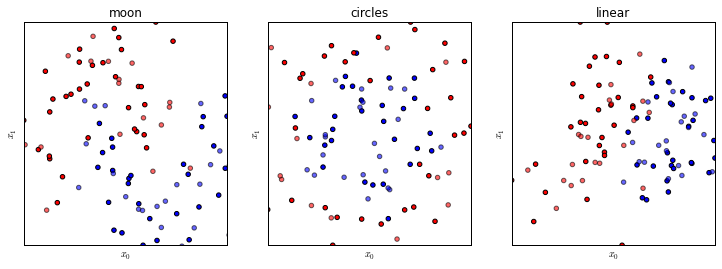

In [31]:
# Adopted from: Gael Varoqueux
#               Andreas Mueller
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

# generate 3 synthetic datasets
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = OrderedDict()
for name, (X, y) in [('moon', make_moons(noise=0.3, random_state=0)),
                    ('circles', make_circles(noise=0.2, factor=0.5, random_state=1)),
                    ('linear', linearly_separable)]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=1)
    # standardize data
    scaler = StandardScaler().fit(X_train)
    datasets[name] = {'X_train': scaler.transform(X_train), 'y_train': y_train,
                      'X_test': scaler.transform(X_test), 'y_test': y_test}
    
# plots the datasets - see Appendix
plot_datasets()

The task in each of the above examples is to separate the red from the blue points. Testing data points are plotted in lighter color. The left example contains two intertwined moon sickles; the middle example is a circle of blues framed by a ring of reds; and the right example shows two linearly separable gaussian blobs.

### Logistic Regression

Logistic regression can be viewed as an extension of linear regression to classification problems. One of the limitations of linear regression is that it cannot provide class probability estimates. This is often useful, for example, when we want to inspect manually the most fraudulent cases.
Basically, we would like to constrain the predictions of the model to the range $[0, 1]$ so that we can interpret them as probability estimates. In Logistic Regression, we use the logit function to clamp predictions from the range $[-\infty, \infty]$ to $[0, 1]$:

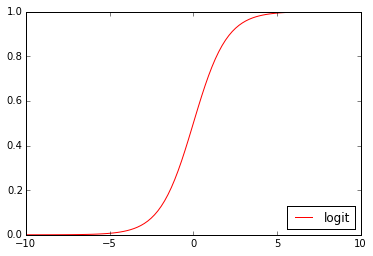

In [32]:
x = np.linspace(-10, 10, 100)
y = 1.0 / (1.0 + np.exp(-x))

plt.plot(x, y, 'r-', label='logit')
plt.legend(loc='lower right')

Logistic regression is available in scikit-learn via the class ``sklearn.linear_model.LogisticRegression``. It uses [liblinear](http://www.csie.ntu.edu.tw/~cjlin/liblinear/), so it can be used for problems involving millions of samples and hundred of thousands of predictors.
Lets see how Logistic Regression does on our three toy datasets:

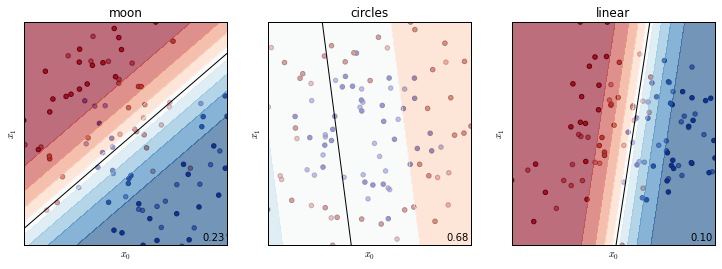

In [33]:
from sklearn.linear_model import LogisticRegression

est = LogisticRegression()
plot_datasets(est)

As we can see, a linear decision boundary is not a poor approximation for the *moon* datasets, although we fail to separate the two tips of the sickles in the center. The cicles dataset, on the other hand, is not well suited for a linear decision boundary. The error rate of $0.68$ is in fact worse than random guessing. For the linear dataset we picked in fact the correct model class -- the error rate of 10% is due to the noise component in our data.
The gradient shows you the probability of class membership -- white shows you that the model is very uncertain about its prediction.

## Appendix

The cell below contains some utility functions that we used to plot the decision surface of a classifier.

In [99]:
from matplotlib.colors import ListedColormap

# utility function to plot the decision surface
def plot_surface(est, x_1, x_2, ax=None, threshold=0.0, contourf=False):
    """Plots the decision surface of ``est`` on features ``x1`` and ``x2``. """
    xx1, xx2 = np.meshgrid(np.linspace(x_1.min(), x_1.max(), 100), 
                           np.linspace(x_2.min(), x_2.max(), 100))
    # plot the hyperplane by evaluating the parameters on the grid
    X_pred = np.c_[xx1.ravel(), xx2.ravel()]  # convert 2d grid into seq of points
    if hasattr(est, 'predict_proba'):  # check if ``est`` supports probabilities
        # take probability of positive class
        pred = est.predict_proba(X_pred)[:, 1]
    else:
        pred = est.predict(X_pred)
    Z = pred.reshape((100, 100))  # reshape seq to grid
    if ax is None:
        ax = plt.gca()
    # plot line via contour plot
    
    if contourf:
        ax.contourf(xx1, xx2, Z, levels=np.linspace(0, 1.0, 10), cmap=plt.cm.RdBu, alpha=0.6)
    ax.contour(xx1, xx2, Z, levels=[threshold], colors='black')
    ax.set_xlim((x_1.min(), x_1.max()))
    ax.set_ylim((x_2.min(), x_2.max()))
    
    
def plot_datasets(est=None):
    """Plotsthe decision surface of ``est`` on each of the three datasets. """
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))
    for (name, ds), ax in zip(datasets.iteritems(), axes):
        X_train = ds['X_train']
        y_train = ds['y_train']
        X_test = ds['X_test']
        y_test = ds['y_test']
        
        # plot test lighter than training
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
        # plot limits
        ax.set_xlim(X_train[:, 0].min(), X_train[:, 0].max())
        ax.set_ylim(X_train[:, 1].min(), X_train[:, 1].max())
        # no ticks
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_ylabel('$x_1$')
        ax.set_xlabel('$x_0$')
        ax.set_title(name)
        if est is not None:
            est.fit(X_train, y_train)
            plot_surface(est, X_train[:, 0], X_train[:, 1], ax=ax, threshold=0.5, contourf=True)
            err = (y_test != est.predict(X_test)).mean()
            ax.text(0.88, 0.02, '%.2f' % err, transform=ax.transAxes)
            
    fig.subplots_adjust(left=.02, right=.98)